In [2]:
# Load data
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("data/Mall_Customers.csv")

# Drop CustomerID
df_clean = df.drop("CustomerID", axis=1)

# Encode Gender
le = LabelEncoder()
df_clean["Gender"] = le.fit_transform(df_clean["Gender"])

# Scale features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Convert to DataFrame for inspection
df_processed = pd.DataFrame(df_scaled, columns=df_clean.columns)
df_processed.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


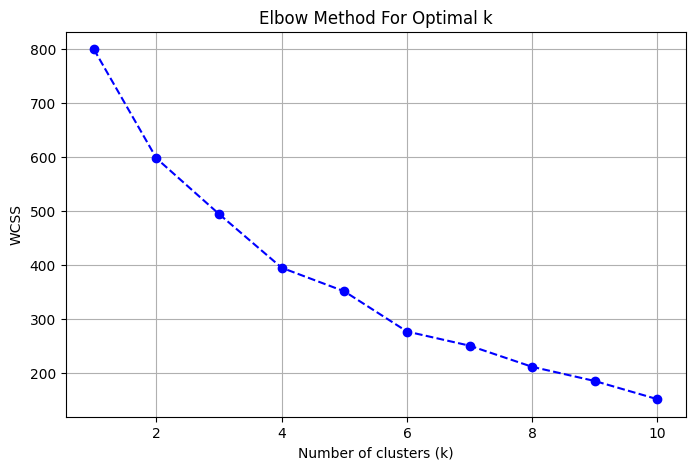

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# WCSS for different k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_processed)  # Use the scaled DataFrame from earlier
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [4]:
from sklearn.cluster import KMeans

# Train the KMeans model with k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
df_processed["Cluster"] = kmeans.fit_predict(df_processed)

# Optional: attach cluster labels to the original data (for interpretation)
df_clean["Cluster"] = df_processed["Cluster"]

# Preview the result
df_clean.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4


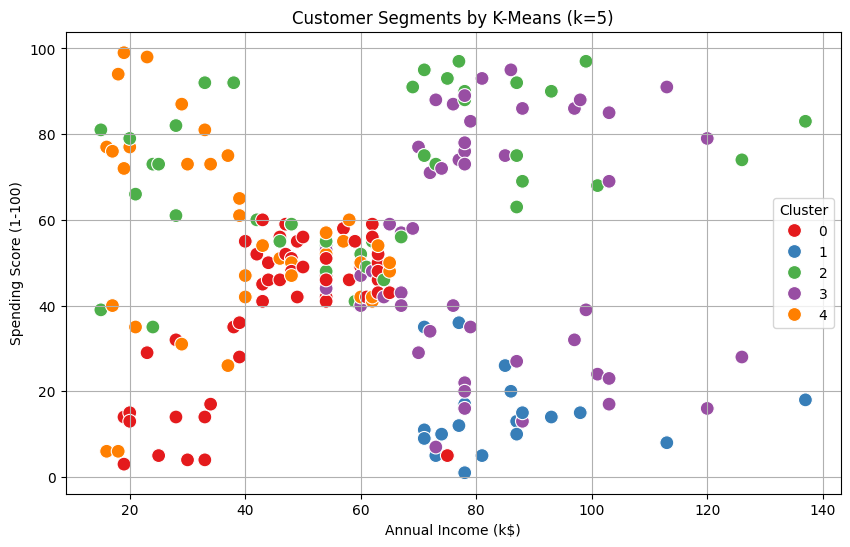

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2D Scatter plot using Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_clean["Annual Income (k$)"],
    y=df_clean["Spending Score (1-100)"],
    hue=df_clean["Cluster"],
    palette="Set1",
    s=100
)
plt.title("Customer Segments by K-Means (k=5)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


In [6]:
df_clean.groupby("Cluster").mean(numeric_only=True)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.509804,56.470588,46.098039,39.313725
1,1.000000,39.500000,85.150000,14.050000
2,1.000000,28.690476,60.904762,70.238095
3,0.000000,37.897959,82.122449,54.448980
4,0.000000,27.315789,38.842105,56.210526


In [7]:
df_clean.to_csv("outputs/clustered_customers.csv", index=False)


In [8]:
import os

# Create models folder if it doesn't exist
os.makedirs("models", exist_ok=True)


In [9]:
import joblib

# Save the model to the models folder
joblib.dump(kmeans, "models/kmeans_model.pkl")
print("Model saved successfully!")


Model saved successfully!
